In [1]:
#1. Acquiring the data ..First Phase
#Goal- The main goal of the project is to predict whether a patient will have a 10 year risk of developing cardio vascular diseases.import numpy as np
import pandas as pd
data=pd.read_csv("Heart_Cogni.csv")#Reading dataset
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


<h2>Understanding Data</h2>

In [2]:
data.shape

(4240, 16)

In [3]:
data.head(10)


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [5]:
print('####   Target Variable  #####')
print('10 year risk of coronary heart disease CHD')
print('(0 = “No”, 1 = “Yes”, )\n')
print(data['TenYearCHD'].value_counts())

####   Target Variable  #####
10 year risk of coronary heart disease CHD
(0 = “No”, 1 = “Yes”, )

0    3596
1     644
Name: TenYearCHD, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015AE9BAFE48>,
      dtype=object)

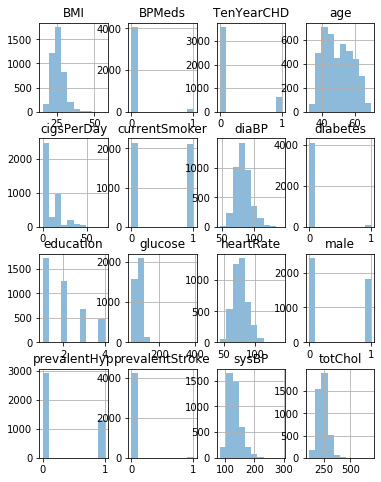

In [6]:
data.hist(figsize=[6,8],alpha=0.5)

In [7]:
data['TenYearCHD'].unique()

array([0, 1], dtype=int64)

In [8]:
#printing correlation for feature Selection

In [9]:
print(data.corr()["TenYearCHD"].abs().sort_values(ascending=False))

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
education          0.054248
heartRate          0.022907
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64


In [10]:
#we will take the features having correlation more than 10%

In [11]:
data_new = data[['TenYearCHD','age','sysBP','prevalentHyp','diaBP','glucose',
         'diabetes']]; 

In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TenYearCHD    4240 non-null   int64  
 1   age           4240 non-null   int64  
 2   sysBP         4240 non-null   float64
 3   prevalentHyp  4240 non-null   int64  
 4   diaBP         4240 non-null   float64
 5   glucose       3852 non-null   float64
 6   diabetes      4240 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 232.0 KB


In [13]:
data_new.describe()

,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,3852.000000,4240.000000
mean,0.151887,49.580189,132.354599,0.310613,82.897759,81.963655,0.025708
std,0.358953,8.572942,22.033300,0.462799,11.910394,23.954335,0.158280
min,0.000000,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,0.000000,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,0.000000,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,0.000000,56.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,1.000000,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


In [14]:
#Check for null values
data_new.isnull().sum()

TenYearCHD        0
age               0
sysBP             0
prevalentHyp      0
diaBP             0
glucose         388
diabetes          0
dtype: int64

In [15]:
#replace null values with mean,mode or median....if numerical value===replace with median ....if catogorical===use mode
data_new['glucose']=data_new['glucose'].fillna(data_new['glucose'].median())


D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#after removing null values
data_new.isnull().sum()

TenYearCHD      0
age             0
sysBP           0
prevalentHyp    0
diaBP           0
glucose         0
diabetes        0
dtype: int64

In [17]:
data_new.dtypes

TenYearCHD        int64
age               int64
sysBP           float64
prevalentHyp      int64
diaBP           float64
glucose         float64
diabetes          int64
dtype: object

<H2>Data Visualization</h2>

0    3596
1     644
Name: TenYearCHD, dtype: int64

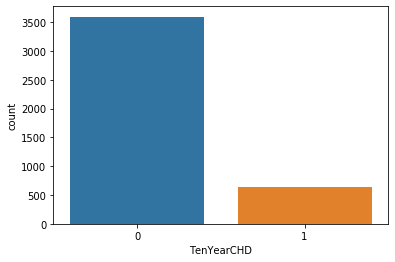

In [18]:
import seaborn as sns
sns.countplot(data_new['TenYearCHD'],data=data_new)
target_conuts=data_new.TenYearCHD.value_counts()
target_conuts

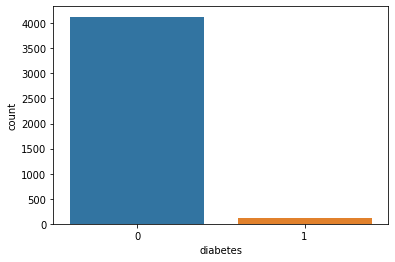

In [19]:
sns.countplot(data_new['diabetes'],data=data_new)


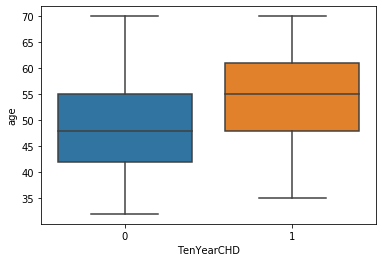

In [20]:
sns.boxplot(data_new['TenYearCHD'],data_new['age'],data=data_new)

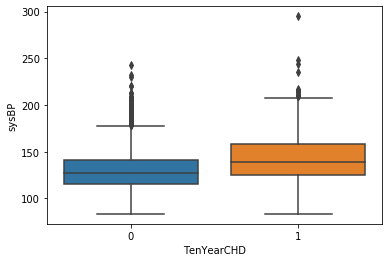

In [21]:
sns.boxplot(data_new['TenYearCHD'],data_new['sysBP'],data=data_new)

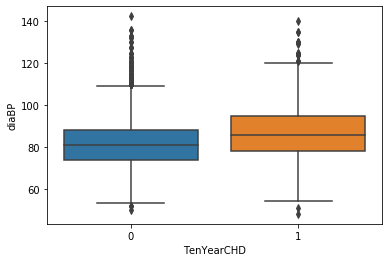

In [22]:
sns.boxplot(data_new['TenYearCHD'],data_new['diaBP'],data=data_new)

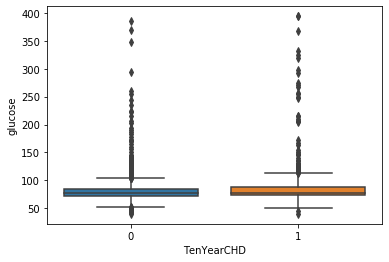

In [23]:
sns.boxplot(data_new['TenYearCHD'],data_new['glucose'],data=data_new)

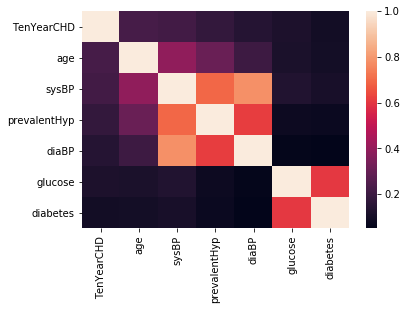

In [24]:
data_corr = data_new.corr()
sns.heatmap(data_corr)


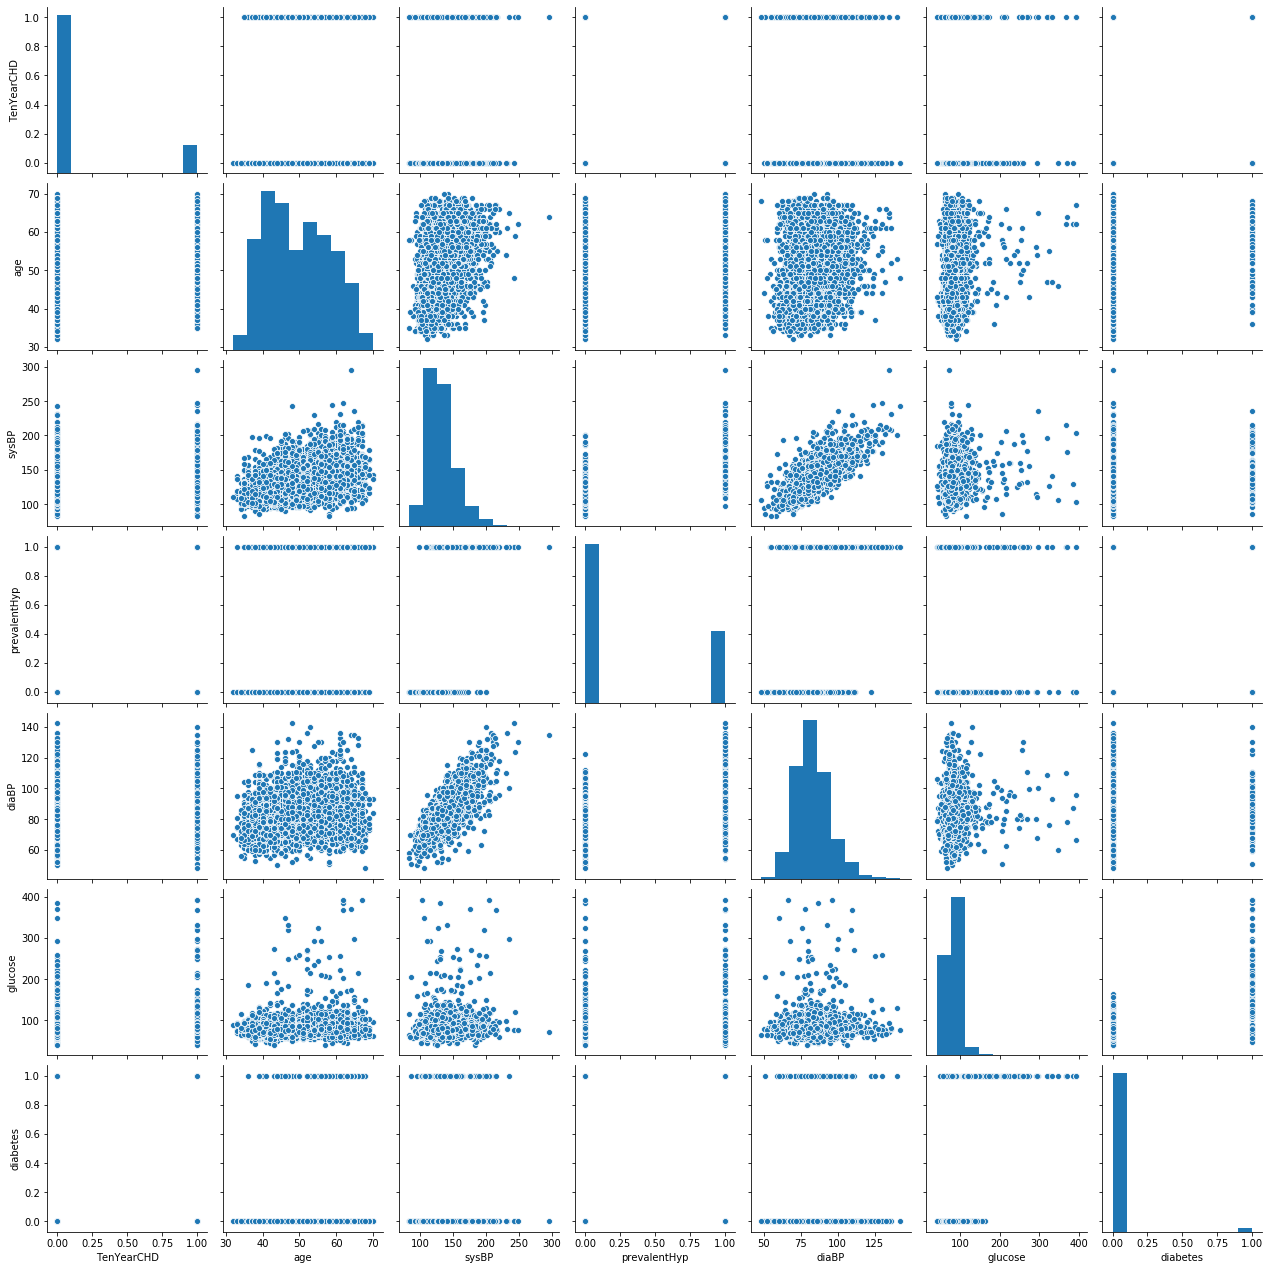

In [25]:
sns.pairplot(data_new)

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


<h2>Feature scaling</h2>

In [27]:
data_new1=data_new

In [28]:
scaler = MinMaxScaler(feature_range=(0,1)) 

#assign scaler to column:
data_scaled = pd.DataFrame(scaler.fit_transform(data_new1), columns=data_new1.columns)


In [29]:
data_scaled.describe()


,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.151887,0.462637,0.230991,0.310613,0.369288,0.117517,0.025708
std,0.358953,0.225604,0.104176,0.462799,0.126036,0.064577,0.158280
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.158392,0.000000,0.285714,0.090395,0.000000
50%,0.000000,0.447368,0.210402,0.000000,0.359788,0.107345,0.000000
75%,0.000000,0.631579,0.286052,1.000000,0.444444,0.127119,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>splitting into Train and Test DATASETS</h2>

In [30]:
X=data_scaled.drop('TenYearCHD',axis=1)
y=data_scaled['TenYearCHD']
print(X)

           age     sysBP  prevalentHyp     diaBP   glucose  diabetes
0     0.184211  0.106383           0.0  0.232804  0.104520       0.0
1     0.368421  0.177305           0.0  0.349206  0.101695       0.0
2     0.421053  0.208038           0.0  0.338624  0.084746       0.0
3     0.763158  0.314421           1.0  0.497354  0.177966       0.0
4     0.368421  0.219858           0.0  0.380952  0.127119       0.0
...        ...       ...           ...       ...       ...       ...
4235  0.421053  0.224586           0.0  0.253968  0.129944       0.0
4236  0.315789  0.203310           0.0  0.412698  0.107345       0.0
4237  0.526316  0.236407           0.0  0.370370  0.189266       0.0
4238  0.210526  0.271868           1.0  0.529101  0.090395       0.0
4239  0.184211  0.234043           0.0  0.402116  0.112994       0.0

[4240 rows x 6 columns]


In [31]:
print(y)

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
4235    0.0
4236    0.0
4237    0.0
4238    0.0
4239    0.0
Name: TenYearCHD, Length: 4240, dtype: float64


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=500)

In [33]:
print(len(X_train),
len(X_test),
len(y_train),
len(y_test))


3392 848 3392 848


In [34]:
#checking balance of outcome variable
target_count = data_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


Class 0: 3596
Class 1: 644
Proportion: 5.58 : 1


We can see that the proportion is 5.57:1 which is not well balanced.
One of the major issues when dealing with unbalanced datasets relates to the metrics used to evaluate a model. Using simpler metrics like accuracy_score can be misleading. In a dataset with highly unbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, obviously illusory.

<h2>Undersampling Method</h2>
Undersampling aims to decrease the number of instances from the overrepresented class in the data set. In our case, these techniques will decrease the number of fraudulent transactions in our data to approximately 50:50. If we do not balance the number of instances, most classification algorithms will heavily focus on the majority class. As a result, it might seem like your algorithm is achieving superb results when, in reality, it is simply always predicting the majority class.

The easiest way to do so is to randomly select observations from the majority class and remove them from the data set until we achieve a balance between the majority and minority class.


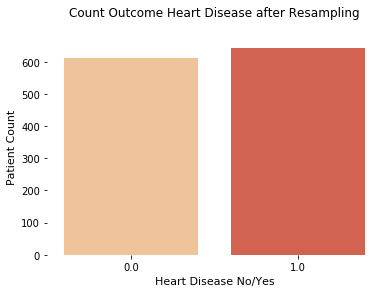

In [35]:
import matplotlib.pyplot as plt
# Shuffle df
shuffled_df = data_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

<h3>Model Pipeline</h3>

In [36]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))


The accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is: 66.39%
The accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 63.68%
The accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_

In [37]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 66.4%
The f1 score for LogReg is: 36.0%
The precision score for LogReg is: 24.7%
The recall score for LogReg is: 66.10000000000001%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

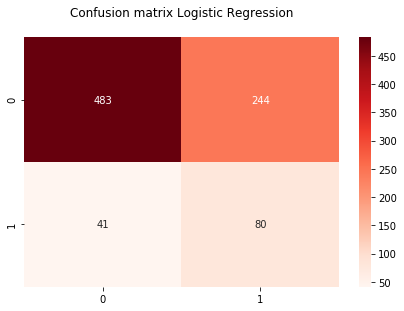

In [38]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
#xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

<h2>Support Vector Machine</h2>

In [42]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")


The accuracy score for SVM is: 63.7%
The f1 score for SVM is: 35.0%
The precision score for SVM is: 23.5%
The recall score for SVM is: 68.60000000000001%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

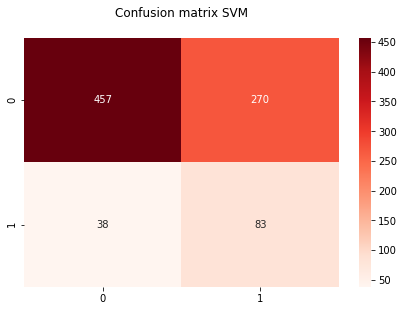

In [43]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

<h3>Decision Tree</h3>

In [44]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 67.7%
The f1 score for DTC is: 46.9%
The precision score for DTC is: 30.599999999999998%
The recall score for DTC is: 100.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

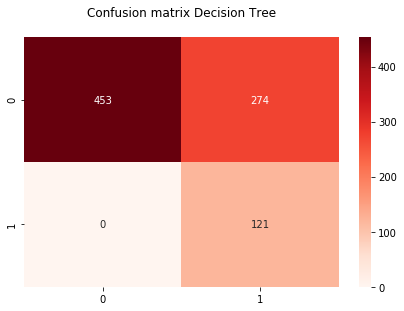

In [45]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
#ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


<h3>KNN</h3>

In [46]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 78.4%
The f1 score for KNN is: 41.5%
The precision score for KNN is: 33.900000000000006%
The recall score for KNN is: 53.7%


 <h1>Result: The KNN model has the highest accuracy score</h1>

In [47]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")



The accuracy score of the test data is:  78.41981132075472 %
The accuracy score of the training data is:  77.37 %


<h3>The scores for test and training data for the KNN model are similar. Therefore we do not expect the model to overfit.</h3>

In [48]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.84198113 0.8384434  0.83490566 0.8384434  0.83136792]
The Accuracy of Model with Cross Validation is: 83.70%


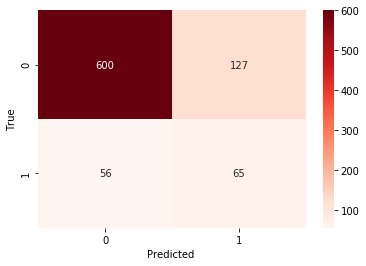

In [49]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


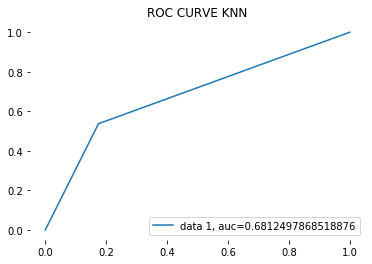

The score for the AUC ROC Curve is: 68.10000000000001%


In [50]:
# AU ROC CURVE KNN
'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

<h1>Deployment Of Model</h1>

In [52]:
def My_Predictor():
    my_predictors = []
    parameters=['age','sysBP','prevalentHyp','diaBP','glucose','diabetes']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(glucose)
    
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
        print("The patient will not develop a Heart Disease.")
        
My_Predictor()

Input Patient Information:
Patient's age: >>> 55
Patient's systolic blood pressure: >>> 130
Was Patient hypertensive? Yes=1, No=0 >>> 1
Patient's diastolic blood pressure: >>> 99
What is the Patient's glucose level? >>> 133
Did Patient have diabetes? Yes=1, No=0 >>> 1


Result:
The patient will develop a Heart Disease.
